# Linear Transformation and Linear Algebra

## Linear transformation

1. Create a data set of points in 2D that constitute a square. Use the same techniques as those introduced in class for building the cube from points along the edges.
2. Make a plot of the square and give points belonging to each side a different color.
3. Apply the horizintal shear transformation with a shear parameter $m=1$. Plot the transformed point set.
4. Apply the rotation  transformation with $\Theta = 45\deg$ in the counterclockwise direction. Plot the transformed point set.

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
n = 5
c = 1.
pencil = linspace(-c/2.,c/2.,n)
upper = 0.5 * ones(n)
lower = -0.5 + zeros(n)

In [3]:
lower

array([-0.5, -0.5, -0.5, -0.5, -0.5])

In [4]:
upperline = array([pencil, upper])
upperoneEdge = reshape(upperline.ravel(order='F'),(n,2))
print(upperline)
print(upperoneEdge)

[[-0.5  -0.25  0.    0.25  0.5 ]
 [ 0.5   0.5   0.5   0.5   0.5 ]]
[[-0.5   0.5 ]
 [-0.25  0.5 ]
 [ 0.    0.5 ]
 [ 0.25  0.5 ]
 [ 0.5   0.5 ]]


In [5]:
lowerline = array([pencil, lower])
loweroneEdge = reshape(lowerline.ravel(order='F'),(n,2))
print(lowerline)
print(loweroneEdge)

[[-0.5  -0.25  0.    0.25  0.5 ]
 [-0.5  -0.5  -0.5  -0.5  -0.5 ]]
[[-0.5  -0.5 ]
 [-0.25 -0.5 ]
 [ 0.   -0.5 ]
 [ 0.25 -0.5 ]
 [ 0.5  -0.5 ]]


In [6]:
oneEdge = vstack((upperoneEdge,loweroneEdge))
oneEdge

array([[-0.5 ,  0.5 ],
       [-0.25,  0.5 ],
       [ 0.  ,  0.5 ],
       [ 0.25,  0.5 ],
       [ 0.5 ,  0.5 ],
       [-0.5 , -0.5 ],
       [-0.25, -0.5 ],
       [ 0.  , -0.5 ],
       [ 0.25, -0.5 ],
       [ 0.5 , -0.5 ]])

In [7]:
sideEdge = fliplr(oneEdge)
sideEdge

array([[ 0.5 , -0.5 ],
       [ 0.5 , -0.25],
       [ 0.5 ,  0.  ],
       [ 0.5 ,  0.25],
       [ 0.5 ,  0.5 ],
       [-0.5 , -0.5 ],
       [-0.5 , -0.25],
       [-0.5 ,  0.  ],
       [-0.5 ,  0.25],
       [-0.5 ,  0.5 ]])

In [8]:
points = vstack((oneEdge, sideEdge))
points

array([[-0.5 ,  0.5 ],
       [-0.25,  0.5 ],
       [ 0.  ,  0.5 ],
       [ 0.25,  0.5 ],
       [ 0.5 ,  0.5 ],
       [-0.5 , -0.5 ],
       [-0.25, -0.5 ],
       [ 0.  , -0.5 ],
       [ 0.25, -0.5 ],
       [ 0.5 , -0.5 ],
       [ 0.5 , -0.5 ],
       [ 0.5 , -0.25],
       [ 0.5 ,  0.  ],
       [ 0.5 ,  0.25],
       [ 0.5 ,  0.5 ],
       [-0.5 , -0.5 ],
       [-0.5 , -0.25],
       [-0.5 ,  0.  ],
       [-0.5 ,  0.25],
       [-0.5 ,  0.5 ]])

<IPython.core.display.Javascript object>


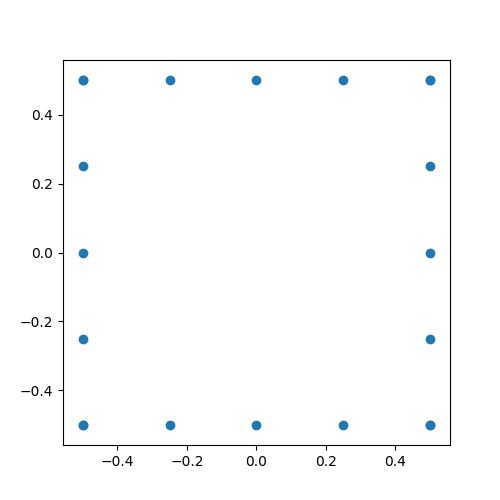

In [9]:
x = points[:,0]
y = points[:,1]
figure(figsize(5,5))
scatter(x,y)
show()

## Gaussian elimination

1. Create your own linear algebra module `linalg` that can be imported into your notebook (see Part.I unit 4). Add the `dot_prod` function from class to the module. Create a tester cell that demonstrates the function.
2. Add a function that takes a matrix (as an array of arrays) and a vector which together represent a set of equations ($\vec{u} = {\bf A} \cdot \vec{v}$) as input. The function solves the equations, i.e. returns $\vec{v}$. Use the Gaussian elemination technique. Following the steps from class (Part.III, unit 3).
3. Your function should have some checks to prevent the user from misusing the function in the most obvious way. Think about and comment on other not so obvious ways in which your function could fail. 

In [2]:
from linalg import dot_prod

In [4]:
1. 

a = array([1,2,3])
b = array([2,2,2])

dot_prod(a,b)

12

In [92]:
def gausselim(A,u):
    '''Gaussian elimination with backsubstution
    
    This function solves the equation u = A * v, where v, u vectors 
    of length N and A a NxN matrix.
    
    input: A, u
    output solution vector v
    '''
    AA = vstack((A.T,u)).T
    AA=AA.astype(float)
    #print(AA)
    
    
    for i in range(len(u)):
        if AA[i,i] != 0:
            AA[i] = AA[i]/AA[i,i]
        #print(AA)
    
        for j in range(i+1,len(u)):     
            AA[j] = AA[j] - AA[j,i]*AA[i]
        #print(AA)
    
    
    BB = copy(AA)
    print(BB)
    m = len(A)-1
    v = zeros(m+1,float)
    print(len(v))
    u = BB.T[-1]
    AA = delete(BB,m+1,1)
    
    for j in range(m,-1,-1):
        v[j] = u[j] - v.dot((AA[j]))

    return v

Use the gaussian elimination function as well as a numpy method to solve the following system of equations:
$$\begin{eqnarray*}
 3 v_1 +  v_2 + 7 v_3 &= 0 \\ 
 6 v_1 -2  v_2 +  v_3 &= 8 \\
 -5 v_1 + 1 v_2 + 3 v_3 &= 1
\end{eqnarray*}$$


In [104]:
v = gausselim(A,u)
v

[[ 1.          0.33333333  2.33333333  0.        ]
 [-0.          1.          3.25       -2.        ]
 [ 0.          0.          1.          1.05555556]]
3


array([-0.65277778, -5.43055556,  1.05555556])

In [106]:
A.dot(v)

array([ -1.77635684e-15,   8.00000000e+00,   1.00000000e+00])

In [102]:
A = array([array([3,1,7]),array([6,-2,1]),array([-5,1,3])])
u = array([0,8,1])
print(A,u)


[[ 3  1  7]
 [ 6 -2  1]
 [-5  1  3]] [0 8 1]


In [107]:
import numpy as np

A.dot(u)
v=np.array(A.dot(u))
np.linalg.solve(A,v)

array([ -2.96059473e-16,   8.00000000e+00,   1.00000000e+00])